### Importando bibliotecas

In [114]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,confusion_matrix,recall_score,precision_score,accuracy_score

### 1. Carregando os dados

In [2]:
import os
import pandas as pd

caminho = 'C:\\Users\\lucas\\Downloads\\superficie_seletiva_de_frequencia\\chest_xray\\chest_xray'

labels = ['train', 'test']
data = []

for folder in labels:
    folder_path = os.path.join(caminho, folder)
    for label in ['NORMAL', 'PNEUMONIA']:
        label_folder = os.path.join(folder_path, label)
        if os.path.exists(label_folder):  # Verifica se a pasta existe
            for file_name in os.listdir(label_folder):
                if file_name.endswith('.jpeg') or file_name.endswith('.png') or file_name.endswith('.jpg'):
                    file_path = os.path.join(label_folder, file_name)
                    data.append([file_path, label.lower()])

df = pd.DataFrame(data, columns=['file_path', 'label'])


### 1.1 Transformando as saídas em 0 e 1

In [3]:
# transformando as labels em 0 e 1
df['label'].unique()
df['label']=df['label'].map({'normal':0,'pneumonia':1})

In [4]:
df['label'].dtype

dtype('int64')

### 1.2 Exibindo as 25 primeiras imagens

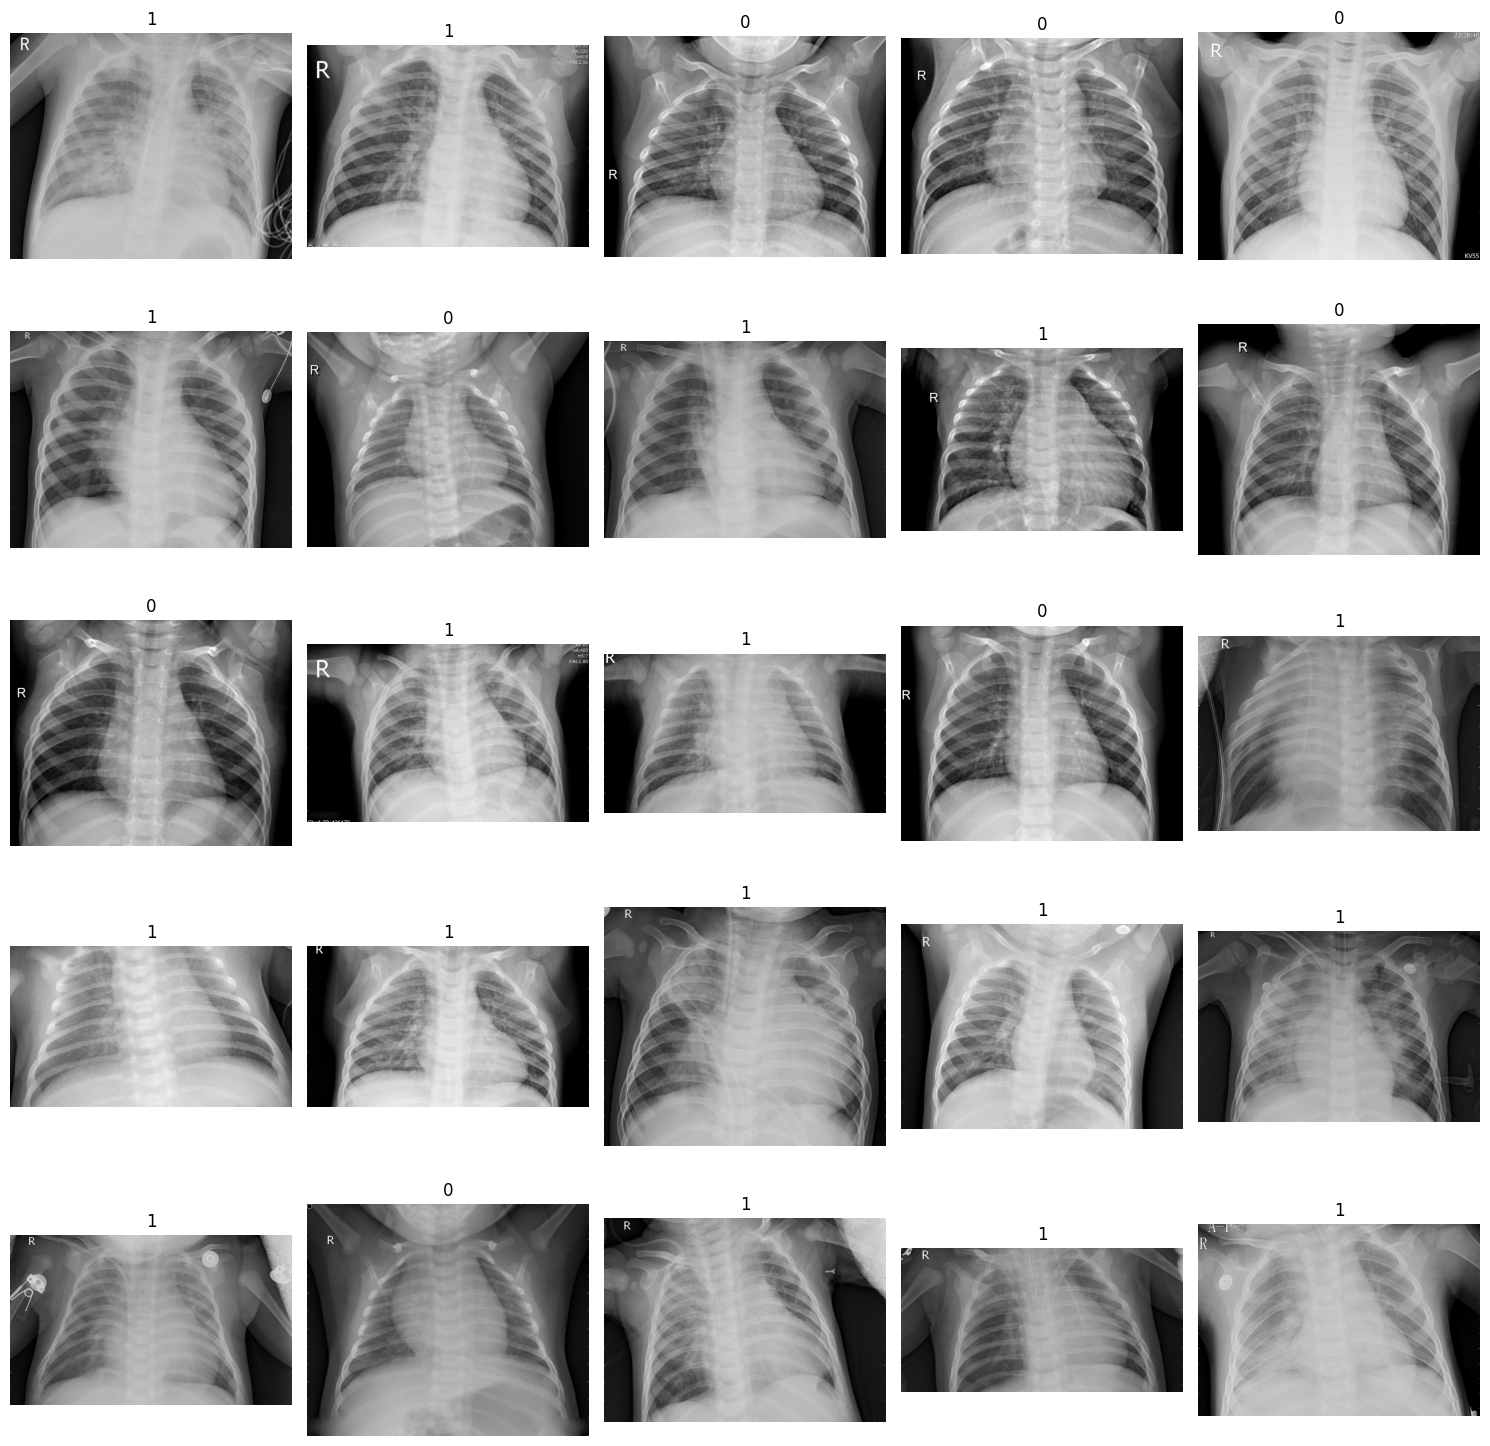

In [90]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i in range(25):
    ax = axes.flatten()[i]
    row = df.sample(1).iloc[0]
    img = cv2.imread(row['file_path'])
    img_norm = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_normalized = img_norm / 255.0
    
    ax.imshow(img_gray_normalized, cmap='gray')
    ax.set_title(row['label'])
    ax.axis('off')

plt.tight_layout()
plt.show()


### 1.3 Exibindo as informações dos dados

In [6]:
df.shape

(5840, 2)

In [7]:
df.head(10)

,file_path,label
0,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
1,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
2,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
3,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
4,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
5,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
6,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
7,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
8,C:\Users\lucas\Downloads\superficie_seletiva_d...,0
9,C:\Users\lucas\Downloads\superficie_seletiva_d...,0


In [8]:
df.tail(10)

,file_path,label
5830,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5831,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5832,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5833,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5834,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5835,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5836,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5837,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5838,C:\Users\lucas\Downloads\superficie_seletiva_d...,1
5839,C:\Users\lucas\Downloads\superficie_seletiva_d...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  5840 non-null   object
 1   label      5840 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 91.4+ KB


In [10]:
# Verificando as dimensões da imagem
img = cv2.imread(df.iloc[0]['file_path'])

altura, largura, d = img.shape
print(img.shape)
print(f"Dimensão da imagem: {largura}x{altura}")

(1858, 2090, 3)
Dimensão da imagem: 2090x1858


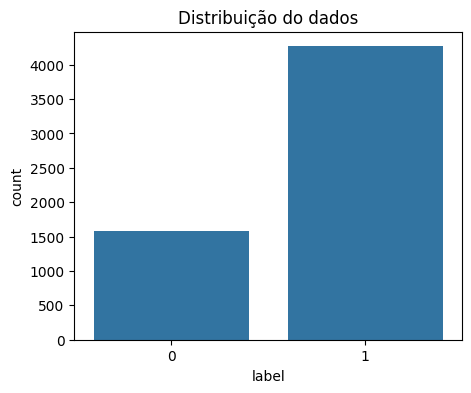

In [11]:
# exibindo a quantidade de registros
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='label')
plt.title('Distribuição do dados')
plt.show()

### 2.0 Normalizando os dados

In [30]:
norm_img = []

for img_path in df['file_path']:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carrega como escala de cinza
    img = cv2.resize(img, (48, 48))
    img = img.astype('float32') / 255.0
    norm_img.append(img[..., np.newaxis])  # Adiciona uma nova dimensão para o canal

X = np.array(norm_img, dtype='float32')
y = df['label'].values


In [91]:
norm_img

[array([[[0.08235294],
         [0.20784314],
         [0.29411766],
         ...,
         [0.53333336],
         [0.39607844],
         [0.36862746]],
 
        [[0.09019608],
         [0.10588235],
         [0.26666668],
         ...,
         [0.6666667 ],
         [0.3764706 ],
         [0.3529412 ]],
 
        [[0.08235294],
         [0.04705882],
         [0.25490198],
         ...,
         [0.41960785],
         [0.37254903],
         [0.32156864]],
 
        ...,
 
        [[0.11372549],
         [0.10980392],
         [0.10196079],
         ...,
         [0.08235294],
         [0.09019608],
         [0.10196079]],
 
        [[0.11764706],
         [0.10980392],
         [0.09411765],
         ...,
         [0.08235294],
         [0.07843138],
         [0.08627451]],
 
        [[0.11372549],
         [0.10196079],
         [0.09803922],
         ...,
         [0.22352941],
         [0.24705882],
         [0.24313726]]], dtype=float32),
 array([[[0.11372549],
         [0.15686

In [92]:
len(norm_img) # quantidade de dados normalizados

5840

### 2.1 Dados de teste e treino

In [33]:
X = np.array(norm_img)
y = df['label']

In [93]:
X

array([[[[0.08235294],
         [0.20784314],
         [0.29411766],
         ...,
         [0.53333336],
         [0.39607844],
         [0.36862746]],

        [[0.09019608],
         [0.10588235],
         [0.26666668],
         ...,
         [0.6666667 ],
         [0.3764706 ],
         [0.3529412 ]],

        [[0.08235294],
         [0.04705882],
         [0.25490198],
         ...,
         [0.41960785],
         [0.37254903],
         [0.32156864]],

        ...,

        [[0.11372549],
         [0.10980392],
         [0.10196079],
         ...,
         [0.08235294],
         [0.09019608],
         [0.10196079]],

        [[0.11764706],
         [0.10980392],
         [0.09411765],
         ...,
         [0.08235294],
         [0.07843138],
         [0.08627451]],

        [[0.11372549],
         [0.10196079],
         [0.09803922],
         ...,
         [0.22352941],
         [0.24705882],
         [0.24313726]]],


       [[[0.11372549],
         [0.15686275],
         [0.19

### 2.2 Separação dos dados

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Analisando as dimensões de treino e de teste

In [97]:
x_train.shape, y_train.shape

((4672, 48, 48, 1), (4672,))

In [98]:
x_test.shape, y_test.shape

((1168, 48, 48, 1), (1168,))

### 3.0 Modelo da rede CNN

In [99]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding ="same", input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu', padding ="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu',  padding ="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu',  padding ="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu',  padding ="same"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.summary()

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,521 (2.55 MB)

 Trainable params: 667,521 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# aplicando o critério de parada e patience de 5
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [102]:
history = model.fit(x_train, y_train, epochs=15, batch_size=50, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.6846 - loss: 1.2374 - val_accuracy: 0.7390 - val_loss: 0.5807
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7267 - loss: 0.5916 - val_accuracy: 0.7390 - val_loss: 0.5697
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.7536 - loss: 0.5228 - val_accuracy: 0.8257 - val_loss: 0.3702
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.8397 - loss: 0.3678 - val_accuracy: 0.8877 - val_loss: 0.2865
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.8839 - loss: 0.2833 - val_accuracy: 0.8385 - val_loss: 0.3753
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8925 - loss: 0.2551 - val_accuracy: 0.9198 - val_loss: 0.2124
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9350 - loss: 0.1887 - val_accuracy: 0.9273 - val_loss: 0.1913
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.9284 - loss: 0.1905 - val_accuracy: 0.9262 

In [103]:
# salvar o loss
pd.DataFrame(history.history).to_csv('loss.csv', index=False)


In [104]:
# salvar o modelo
model.save('model.keras')

### 3.1 Visualizando o erro e a acurácia

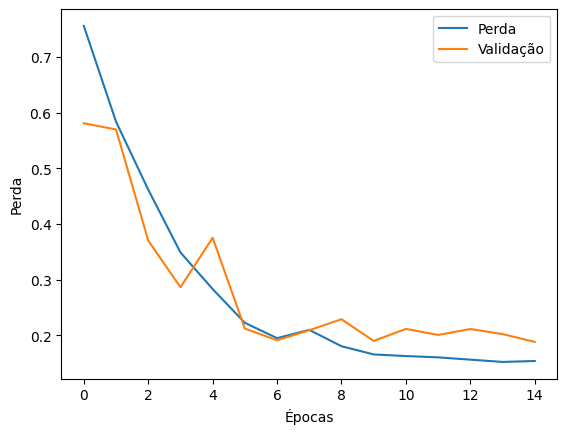

In [105]:
plt.plot(history.history['loss'], label='Perda')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

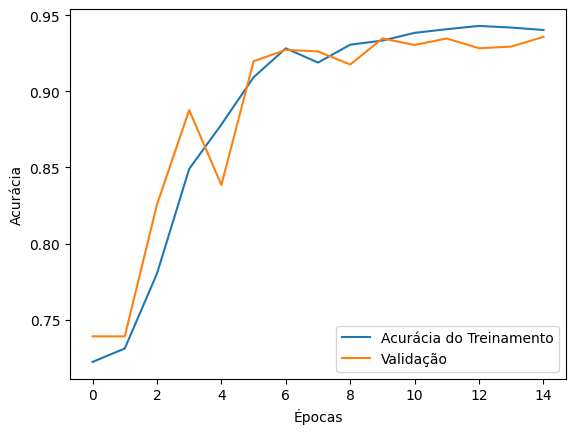

In [106]:
plt.plot(history.history['accuracy'], label='Acurácia do Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [108]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Acurácia do modelo: {acc * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9371 - loss: 0.1583
Acurácia do modelo: 93.49%


In [89]:
predict = model.predict(x_test)

predict

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[9.9518478e-01],
       [1.4230670e-02],
       [2.7831110e-01],
       ...,
       [9.9999970e-01],
       [7.9925156e-01],
       [6.0054497e-04]], dtype=float32)